Лабараторная работа 3

Классификация в sklearn. Метрики классификации.

Выполнил: Студент группы 6131-010402D, Макаров Андрей Романович

Выбор и описание набора данных:

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn, sklearn.model_selection

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine, load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, confusion_matrix, accuracy_score



In [2]:
# Вывод результата(подсмотрел у однокурсника)
def print_result(y_test, pred=None):
  print("результат классификации: \n", classification_report(y_test, pred))
  conf_matrix = confusion_matrix(y_test, pred)
  print("Матрица ошибок: \n", conf_matrix, "\n")
  sns.heatmap(conf_matrix, annot=True)
  plt.show()

In [3]:
# Подгрузили датасет и вывели краткое описание
data = load_wine()
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Характеристики набора данных:

Количество экземпляров: 178 (по 50 в каждом из трех классов)

Количество признаков: 3 числовых, прогнозирующих атрибутов и класса

Признаки:
1. Алкоголь
2. Яблочная кислота
3. Пепел
4. Щелочность золы
5. Магний
6. Всего фенолов
7. Флавоноиды
8. Нефлаваноидные фенолы
9. Проантоцианы
10. Интенсивность цвета
11. Оттенок/цвет/тон
12. OD280/OD315 разбавленных вин
13. Пролин

In [4]:
# Подгрузим data в датафрейм и выведем 10 первых строк таблицы
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


1. Многоклассовая классификация

 1.1. Пример с оценкой accuracy.

Описание "sklearn.model_selection.train_test_split"

Разделите массивы или матрицы на случайные поезда и тестовые подмножества.

Быстрая утилита, которая объединяет проверку ввода и приложение для ввода данных в один вызов для разделения

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data['data'], data['target'], test_size = 0.33, random_state = 0)

In [6]:
# Создадим классификатор, обучим модель и подсчтитаем точность
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print( "Accuracy GaussianNB: " + str(model.score(X_test, y_test)))

Accuracy GaussianNB: 0.9491525423728814


In [7]:
# Создадим классификатор, обучим модель и подсчтитаем точность
model_2 = LogisticRegression(max_iter=5000)
model_2.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)
print( "Accuracy LogisticRegression: " + str(model_2.score(X_test, y_test))) 

Accuracy LogisticRegression: 0.9830508474576272


1.2 С применением кросс-валидации

In [8]:
cvs = cross_val_score(model, X_train, y_train, cv=5)  # Применили кросс валидацию
print("Точности по кросс валидации: " + str(cvs))
cvs = sum(cvs)/len(cvs)
print("Средняя точность в результате кросс валидации: "+ str(cvs)) 

Точности по кросс валидации: [0.91666667 1.         1.         1.         0.91304348]
Средняя точность в результате кросс валидации: 0.9659420289855072


In [9]:
cvs = cross_val_score(model_2, X_train, y_train, cv=5)  # Применили кросс валидацию
print("Точности по кросс валидации: " + str(cvs))
cvs = sum(cvs)/len(cvs)
print("Средняя точность в результате кросс валидации: "+ str(cvs)) 

Точности по кросс валидации: [0.79166667 0.95833333 1.         1.         0.95652174]
Средняя точность в результате кросс валидации: 0.941304347826087


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# KNN для 5 соседей
   
model_1 = KNeighborsClassifier(n_neighbors = 5)
model_1.fit(X_train, y_train)
knn_classif = model_1.predict(X_test)
accuracy_score(y_test, knn_classif) 

0.7288135593220338

In [12]:
# Меняем количество соседей

best_accuracy = 0
best_neib = 0

for i in range(1, 40):

    best_model_KNN = KNeighborsClassifier(n_neighbors = i)
    best_model_KNN.fit(X_train, y_train)
    pred_i = best_model_KNN.predict(X_test)
    accur = accuracy_score(y_test, pred_i)

    if accur > best_accuracy:
        best_accuracy = accur
        best_neib = i

In [13]:
# И использованием лучшего количества соседей
model_2 = KNeighborsClassifier(n_neighbors = best_neib)
    
model_2.fit(X_train, y_train)
y_knn2 = model_2.predict(X_test)

In [14]:
accuracy_score(y_test, y_knn2) 

0.7796610169491526

Вычисление матрицы ошибок

In [15]:
conf_mat_KNN_class = confusion_matrix(y_test, knn_classif)
conf_mat_KNN_class

array([[19,  1,  0],
       [ 1, 19,  4],
       [ 6,  4,  5]], dtype=int64)

In [16]:
"""
ДЛЯ КНН 

3. Использование нормализации признаков 
В обоих задачах (бинарной и многоклассовой классификации) попробовать 
также вариант с предварительной нормализацией признаков 
(StandardScalerили MinMaxScaler). 
"""
scaler_ = StandardScaler()

X_train_scal = scaler_.fit_transform(X_train)
X_test_scal = scaler_.transform(X_test)

model_3 = KNeighborsClassifier(n_neighbors = best_neib)
    
model_3.fit(X_train_scal, y_train)
y_knn3 = model_3.predict(X_test_scal)

In [17]:
accuracy_score(y_test, y_knn3) 

0.9322033898305084

2. Бинарная классификация

Для бинарной классификации использую датасет "Boston"

In [18]:
data_2 = load_boston()
print(data_2['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\anma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        tar

In [19]:
df = pd.DataFrame(data_2.data, columns=data_2.feature_names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Бинаризация полей. 

Необходимо добавить номер класса для каждого объекта в дата фрейме, будем считать ср. значение для гпорога классов 0 и 1 по столбцу "CRIM" - "уровень преступности на душу населения в разбивке по городам"

In [20]:
print("Порогд для бинаризации - " + str(df["CRIM"].mean()))

Порогд для бинаризации - 3.613523557312254


Создадим слотбец для номеров класса

In [21]:
df["number_binar"] = 0

In [22]:
df.loc[(df.CRIM <= 3.6),"number_binar"] = 0
df.loc[(df.CRIM > 3.6),"number_binar"] = 1

In [23]:
print("Класс 0 - " + str(len(df[df["number_binar"] == 0])))
print("Класс 1 - " + str(len(df[df["number_binar"] == 1])))


Класс 0 - 378
Класс 1 - 128


In [24]:
target_ = df.number_binar
featur_ = df.drop(['number_binar'], axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(featur_, target_, test_size=0.25, random_state=21, shuffle=True)


результат классификации: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        32

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

Матрица ошибок: 
 [[95  0]
 [ 0 32]] 



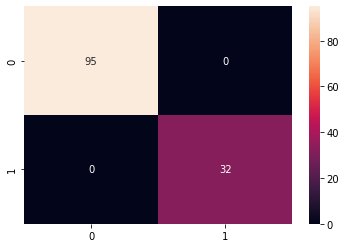

In [26]:
Log_r = LogisticRegression(random_state=42, solver='newton-cg')
Log_r.fit(X_train ,y_train)
Log_r_pred = Log_r.predict(X_test)

print_result(y_test=y_test, pred=Log_r_pred)

Оценка точности бинарной классификации 

In [27]:
scores = cross_val_score(Log_r, X_train, y_train, cv=5)
print('Средняя оценка точности -', np.mean(scores))

Средняя оценка точности - 0.9868421052631579


C:\Users\anma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [28]:
"""
ДЛЯ БИНАРНОГО КЛАССИФИКАТОРА

3. Использование нормализации признаков 
В обоих задачах (бинарной и многоклассовой классификации) попробовать 
также вариант с предварительной нормализацией признаков 
(StandardScalerили MinMaxScaler).
"""



scaler = StandardScaler()

X1_train_bin = scaler.fit_transform(X_train)
X1_test_bin = scaler.transform(X_test)

model_Log1 = LogisticRegression()
    
model_Log1.fit(X1_train_bin, y_train)

Y_Log1 = model_Log1.predict(X1_test_bin)
        
accuracy_score(y_test, Y_Log1)

1.0